In [ ]:
from IPython.display import Image

## Part 1: Plain Aggregates and Privacy


In [ ]:
# Call the client to retrieve the count of users by age who like music
!python3 client.py count age music

### Linking Attack - Reasoning and Public Information

After reviewing the aggregate results, I searched for publicly available information about **Kinan Bab** to see whether I could connect any of it to the dataset.

---

### Question 1

> What can you nevertheless learn about Kinan's musical tastes?
> What possible genres might they have chosen?
> Alternatively, what genres is it impossible for them to have chosen?

#### Answer - Music Preference

From different public sources, I found the following clues:

* On **X (formerly Twitter)**, I found a friend of Kinan’s replying to him in posts that frequently mentioned *metal* music.
* On **Kinan’s personal website**, he referenced the metal band *Vildhjarta*, specifically their album *“+ där skogen sjunger under evighetens granar +”* (which is metal).
* Based on Kinan’s personality, *pop* seems too ordinary for him 😄

All this strongly suggests that **metal** is Kinan’s preferred music genre.

---

### Question 2

> What did you find out about Kinan? Are your findings consistent with Question 1?
> Combine the two together to learn Kinan's exact age.

#### Answer - Age Estimation

On [**LinkedIn**](https://www.linkedin.com/in/kinanbab/), Kinan lists his education timeline:

* Bachelor’s degree: around **2012 - 2015**
* Master’s degree: around **2016 - 2020**
* PhD: completed in **2025**

Assuming a typical academic path:

* Start Bachelor’s at 18 → finish at 22 (4 years)
* Master’s 23 → 27 (4 years)
* PhD 27 → 31 (5 years)

This suggests Kinan’s current age is approximately **31 years old**.

Comparing this to the dataset (most people 19 - 25), it is clear that he is older. The only other possible age is 32.

Why not 32? The dataset shows that ages 31 and 32 each have only one record. He could be either the metal or pop entry, but based on personality and prior findings, **metal fits best**.

---

### Linking the Aggregate Data

By combining these insights:

* The dataset shows counts by **(age, genre)**
* From public data, we know Kinan is **31 years old** and prefers **metal**
* If the aggregate output contains `(age = 31, genre = metal)` with a **count of 1**, that record almost certainly corresponds to **Kinan Bab**

Even though the dataset contains *no explicit identifiers*, linking publicly available information allows **re-identification**.

---

### Conclusion

> Non-noised aggregate statistics are insufficient for privacy protection.
> Differential privacy adds controlled randomness (noise) that prevents linking attacks and ensures individuals cannot be identified from aggregated data.




In [ ]:
# Call the client to retrieve the count of users by age and color preference
!python3 client.py count age color

### Question 3

> Identify Kinan's favorite color. What is it? How easy or obvious is this to do, and why?

#### Answer - Favorite Color

Since we already know Kinan is 31 years old and loves *metal* music, we can reasonably guess that his favorite color is **black** from the dataset. 
Also, it fits his musical taste and overall aesthetic.


In [ ]:
!python3 client.py count agegroup sport

### Question 4

> What information can you learn about Kinan's favorite sport from the above query?

#### Answer - Favorite Sport Reasoning

This one is a bit trickier because I don’t know his exact age group bucket. Since Kinan is above 30, I can ignore all responses from people under 30 and focus on the last two groups.

If the data is sorted, the last two rows (ages 31 and 32) each have only one record. My guess is **baseball** is Kinan’s favorite sport.  

If the data isn’t sorted, the options could be **baseball** or **e-sports**. 

Last year's table: 


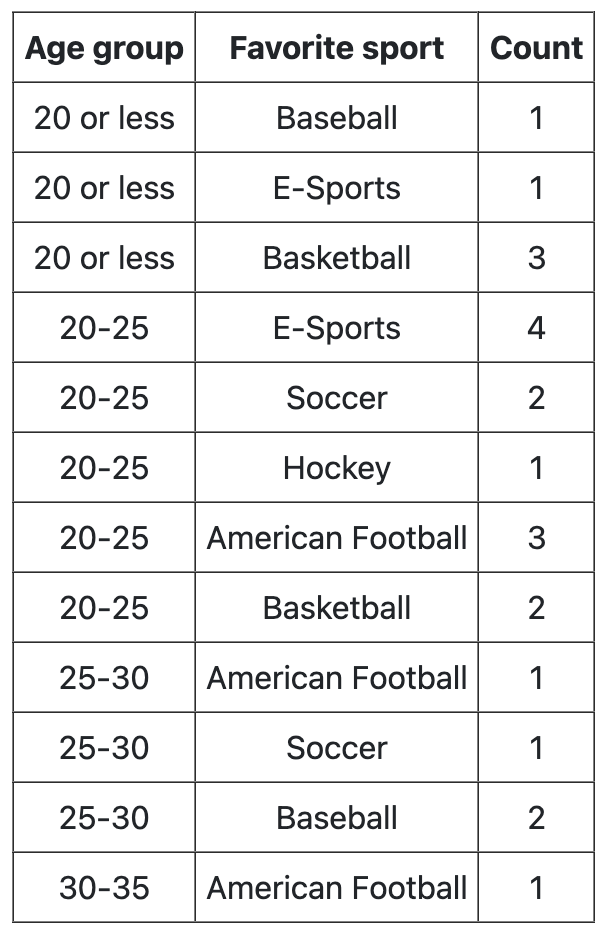

Using last year’s table and the overlap with this dataset:

- Kinan’s age last year would have been around 30 or 31  
- That places him among the last four rows of the table  
- The only matching option between datasets is **baseball**  

So based on context and dataset overlap, **baseball** seems most likely.


---

### Question 5

> What is Kinan's favorite sport?

#### Answer - Final Guess

Putting it all together from the reasoning above:  
**Kinan’s favorite sport is baseball**.  

## Part 2: Implementing Differential Privacy

In [ ]:
!python3 client.py count age music

In [ ]:
!python3 dp.py 0.01
Image('dp-plot.png')

In [ ]:
!python3 dp.py 0.1
Image('dp-plot.png')

In [ ]:
!python3 dp.py 0.05
Image('dp-plot.png')

In [ ]:
!python3 dp.py 0.5
Image('dp-plot.png')

In [ ]:
!python3 dp.py 1.0
Image('dp-plot.png')

In [ ]:
!python3 dp.py 5.0
Image('dp-plot.png')

In [ ]:
!python3 client.py count age music
!python3 dp.py 0.5
Image('dp-plot.png')

### Question 6

> What happens with different ε values?

#### Answer - Observations

I ran `dp.py` with different ε values and noticed:

- **Big ε (1, 5, 10)**  
  - The counts stayed pretty close to the real values.  
  - The histogram looks accurate.  
  - Privacy is weaker since you could tell more about individual data.

- **Medium ε (0.5)**  
  - The noise is noticeable but not crazy.  
  - Some counts can still go negative, but overall it’s a good balance between privacy and accuracy.

- **Small ε (0.1, 0.05, 0.01)**  
  - The noise gets huge, sometimes giving really high or negative counts.  
  - Privacy is strong, but the histogram doesn’t look very realistic.

**In short:**  
- Small ε → strong privacy, noisy counts, some negative.  
- Medium ε (0.5) → decent privacy, mostly reasonable counts.  
- Large ε → weak privacy, counts close to true values.  

In [ ]:
# Okay let's run with epsilon = 0.5 again to answer question 7 compared to the original one
!python3 client.py count age music
!python3 dp.py 0.5
Image('dp-plot.png')

In [ ]:
# Then we will call plot function to generate the plot for epsilon = 0.5
# and return the dp_counts value so we can analyze it
from dp import dp_histogram, plot
dp_counts = plot(0.5)
dp_counts

In [ ]:
vlaues_mode = {}
for i in dp_counts:
    if i in vlaues_mode and i != 0:
        vlaues_mode[i] += 1
    else:
        vlaues_mode[i] = 1
mode_value = max(vlaues_mode, key=vlaues_mode.get)
print("The mode value is:", mode_value)
values_mean= sum(dp_counts) / len(dp_counts)
print("The mean value is:", values_mean)

### Question 7: Effect of Noise on the First Row

For the first row in the histogram (age 19, Pop), the original count without noise is **1**.  

After running the differentially private histogram 150 times with **epsilon = 0.5**, I got the following from the plot data:

- **Mode (most likely value):** 2  
- **Mean (average value):** ~1.91  

**Observations:**  
- The mode shows the value that appeared most often after adding Laplace noise. In this case, it’s slightly higher than the original because some noisy counts were above 1.  
- The mean is close to the original value, which matches the idea that the noise is unbiased on average.  
- Each run gives a slightly different count due to randomness, which is how privacy is maintained.  
- This also shows why limiting queries with a **privacy budget** is important, otherwise, averaging lots of noisy results could leak the true count.


## Part 3: Differential Privacy and Composition

In [ ]:
!python3 client.py dp avg age programming

In [ ]:
from client import avg

# Run the DP average query multiple times
for i in range(50):
    print(f"Run {i+1}:")
    headers, rows = avg(["programming"], "age", True)
    for row in rows:
        print(row)



#### Observations

Values vary a lot, sometimes extreme or even negative. But if you look across many runs, averages start clustering around realistic numbers. This is exactly how repeated queries can slowly leak info if there’s no budget control.

In [ ]:
# Trying to attack by running 200 times and use the median of the results
!python3 composition.py

### Question 8

> What does this say about Kinan’s programming experience?

#### Answer - Deduction

The exposed averages suggest Kinan is most likely in the "More than 10 Years" or "5-8 Years" programming experience group. Since Kinan is 31 and started his bachelor in 2015, it’s impossible for him to have less than 5 years of experience.

The "More than 10 Years" group shows an average age of 25, but if it only included Kinan and one other person, the other person would have to be 19 to reach that average, which doesn’t make sense. This implies there may be more people in that group, or the DP average is slightly off due to noise.

Given his education and timeline, "5-8 Years" is also plausible, but anything less than that is ruled out. So, while we can’t be 100% certain, the data strongly suggests Kinan has at least 5-8 years of programming experience, and quite likely more.

Confidence is high based on his profile, but small errors in DP averages or unknown dataset members could slightly affect the conclusion.

In [ ]:
!python3 client.py dp count0 programming


### Question 9

> Using counts and averages, what can we deduce exactly?

#### Answer - Counts and Programming Experience
Using the composition attack on the **count** query grouped by programming experience, we can recover the exact non-noised counts per group. Combined with the previously exposed averages, we can deduce Kinan’s programming experience level with high confidence.

* Kinan is **31 years old**, older than the averages of all groups except possibly “5-8 Years” or “More than 10 Years.”
* The “More than 10 Years” group has an average age of 25 with only **2 members**. For the average to be 25, the other member would have to be **19**, which is not plausible based on education timeline.
* The “5-8 Years” group has an average age of 29 with **4 members**. This is compatible with Kinan being 31, making it the most plausible group.
* Groups with less than 5 years of experience are impossible given his age and education timeline.

#### Final Summary About Kinan

* **Age:** 31
* **Favorite Music:** Metal
* **Favorite Sport:** Baseball
* **Programming Experience:** Most likely **5-8 years**, very likely not less, possibly more if there are unreported members in the >10 years group.

**Confidence:** High, because the counts and averages together make other groups implausible.

**Possible Errors:**

* Small DP noise could slightly shift averages.
* Unknown dataset members could change group averages, making “More than 10 Years” plausible if there are more than 2 people.
* But given the education timeline and dataset, the conclusion is very reasonable.


In [ ]:
!python3 client.py count age music

In [ ]:
!python budget.py

### Question 10

> Does the BudgetTracker class really stop overuse?

#### Answer - Privacy Budget Enforcement
No, this class does not actually guarantee that the dataset will never be used beyond its privacy budget. It only tracks the budget in the code, which means anyone can bypass it by directly calling the underlying functions or by creating a new `BudgetTracker` instance to reset the budget. It is just a simple simulation, not real protection.

A better approach would be to enforce the privacy budget at the data system or database level. The system itself should record how much privacy budget has been used and automatically block further queries once it runs out. Real enforcement needs to happen where the data is stored, not just in the client code. Without real enforcement, composition attacks like the ones above could still leak true data.
